In [13]:
from sympy import *
from sympy.plotting import plot, plot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [22]:
init_printing(
    use_latex=True, scale=1.0, order='grlex',
    forecolor='Black', backcolor='White'
)

In [54]:
s_n, a_1, a_n, n_, r, r_1, r_n = symbols(
    'S_n a_1 a_n n r r_1 r_n', integer=True
)

# Progressão aritmética (PA)

**PA de primeira ordem**

$$a_n = a_1 + (n - 1)r$$
$$S_n = \frac{(a_1 + a_n)n}{2}$$

**PA de segunda ordem**

**PA de terceira ordem**

**PA de ordem** $k$

## Implementação com `lambda`, `for` e `sympy`

In [91]:
# implementação das fórmulas utilizando lambda

an_pa_primeira_ordem = lambda a1, n, r: a1 + (n-1)*r
sn_pa_primeira_ordem = lambda a1, an, n: int((a1+an)*n/2)

an_pa_segunda_ordem = lambda a1, r1, n, r: a1 + int(r1*(n-1) + (r/2)*(n-2)*(n-1))

In [ ]:
# implementação iterativa com for

def an_pa_primeira_ordem_for(a1, n, r):
    an = a1
    for i in range(n-1):
        an += r
    return an

def pa_primeira_ordem_for(a1, n, r):
    pa = [a1]
    for i in range(n-1):
        pa.append(pa[-1] + r)
    return pa

def sn_pa_primeira_ordem_for(a1, n, r):
    pa = pa_primeira_ordem_for(a1, n, r)
    return sum(pa)

In [52]:
# implementação das fórmulas com o sympy
# pa primeira ordem

an_pa_primeira_ordem_ = Eq(a_n, a_1 + (n_ - 1)*r)
sn_pa_primeira_ordem_ = Eq(s_n, (a_1 + a_n)*n_/2)

display(an_pa_primeira_ordem_)
display(sn_pa_primeira_ordem_)

In [102]:
# implementação das fórmulas com o sympy
# pa segunda ordem

an_pa_segunda_ordem_ = Eq(a_n, a_1 + r_1*(n_ - 1) + (r/2)*(n_ - 2)*(n_ - 1))
# sn_pa_primeira_ordem_ = Eq(s_n, (a_1 + a_n)*n_/2)

display(an_pa_segunda_ordem_)
# display(sn_pa_primeira_ordem_)

## PA de primeira ordem - exemplo
Gerando o trigésimo quarto termo $s_{34}$ da PA $s$ e calculando a soma $S_{34}$, sendo

$$s = \{0, 2, 4, 6, 8, 10, \dots a_n\}$$

In [56]:
# lambda

print(an_pa_primeira_ordem(a1=0, n=34, r=2))
print(sn_pa_primeira_ordem(a1=0, an=66, n=34))

66
1122


In [84]:
# for

print(an_pa_primeira_ordem_for(a1=0, n=34, r=2))
print(sn_pa_primeira_ordem_for(a1=0, n=34, r=2))

66
1122


In [58]:
# sympy

display(an_pa_primeira_ordem_.subs({a_1: 0, n_: 34, r: 2}))
display(sn_pa_primeira_ordem_.subs({a_1: 0, a_n: 66, n_: 34}))

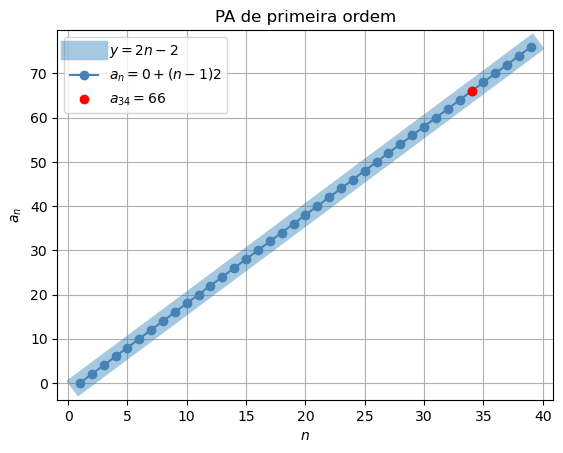

In [88]:
# plotando

X = range(1, 40)
Y = [an_pa_primeira_ordem(a1=0, n=n, r=2) for n in X]
Yl = [2*i - 2 for i in X]

plt.plot(X, Yl, linewidth=14, alpha=.4, label='$y = 2n - 2$');
plt.plot(X, Y, marker='o', color='steelblue', label='$a_n = 0+(n-1)2$');
plt.scatter(34, 66, color='r', zorder=3, label='$a_{34} = 66$');

plt.title('PA de primeira ordem');
plt.xlabel('$n$');
plt.ylabel('$a_n$');
plt.legend();
plt.grid();

## PA de segunda ordem - exemplo
Gerando o trigésimo quarto termo $s_{34}$ da PA $s$ e calculando a soma $S_{34}$, sendo

$$s = \{2, 3, 5, 8, 12, 17, \dots a_n\}$$

In [93]:
print(an_pa_segunda_ordem(a1=2, r1=1, n=34, r=1))

563


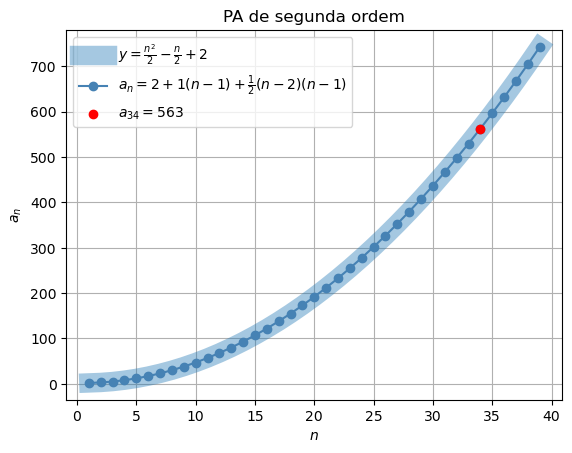

In [121]:
X = range(1, 40)
Y = [an_pa_segunda_ordem(a1=2, r1=1, n=i, r=1) for i in X]
Yl = [(1/2)*i**2 - (1/2)*i + 2 for i in X]

plt.plot(X, Yl, linewidth=14, alpha=.4, label=r'$y = \frac{n^2}{2} - \frac{n}{2} + 2$');
plt.plot(X, Y, marker='o', color='steelblue', label=r'$a_n = 2 + 1(n-1) + \frac{1}{2}(n-2)(n-1)$');

plt.scatter(34, 563, color='r', zorder=3, label='$a_{34} = 563$');

plt.title('PA de segunda ordem');
plt.xlabel('$n$');
plt.ylabel('$a_n$');
plt.legend();
plt.grid();